In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

x = np.random.gumbel(50, 10, 175)
y = x * 70000
noise = np.random.normal(0, 800000, 175)#+ np.random.uniform(-500000, 500000, 875)
y = y + noise

In [3]:
def net_input(W, X, b):
    assert len(W) == len(X), "len(W) != len(X)"
    assert len(X) == len(W), "len(X) != len(W)"
    result = 0
    for i in range(len(X)):
        result += W[i] * X[i]
    result += b
    return result

In [4]:
W = [1, 2, 3]
b = 1
X = [4, 5, 6]
Y = net_input(W, X, b)
Y

33

In [5]:
def cost_function(Y_hat, Y):
    return np.sum(np.square(Y_hat - Y)) / Y.shape[0]

In [6]:
Y_hat = np.array([0, 0, 0])
Y = np.array([1, 2, 3])
cost_function(Y_hat, Y)

4.666666666666667

In [8]:
def cost_function_derivative_w(Y_hat, Y, X):
    return 2 * np.sum((Y_hat - Y) * X) / Y.shape[0]

def cost_function_derivative_b(Y_hat, Y):
    return 2 * np.sum(Y_hat - Y) / Y.shape[0]

In [9]:
W = np.array([0])
b = np.array([0])
LEARNING_RATE = 10e-7
NUM_ITERATIONS = 500
for i in range(0, NUM_ITERATIONS):
    #print('{} step'.format(i))
    y_hat = np.array([net_input(W, [x_single], b) for x_single in x])
    #print('cost funcrion: ', cost_function(y_hat, y))
    W = W - LEARNING_RATE * cost_function_derivative_w(y_hat, y, x)
    b = b - LEARNING_RATE * cost_function_derivative_b(y_hat, y)

print(W)
print(b)

[76875.41169811]
[-36904.23776691]


<function matplotlib.pyplot.show(*args, **kw)>

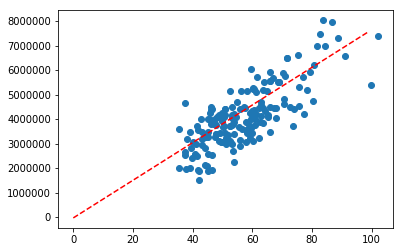

In [10]:
plt.plot(x, y, 'o')
plt.plot(np.arange(0, 100), np.arange(0, 100) * W + b, 'r--')
plt.show